# Linear Regression

### Import Library Required

In [272]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

### Load Data

In [273]:
data = load_diabetes(as_frame=True)
X = data.data
y = data.target
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### Explore Data
#### Make Pair Plot

In [15]:
plt.figure()
sns.pairplot(data.frame)

<IPython.core.display.Javascript object>

### Correlation Plot

<IPython.core.display.Javascript object>


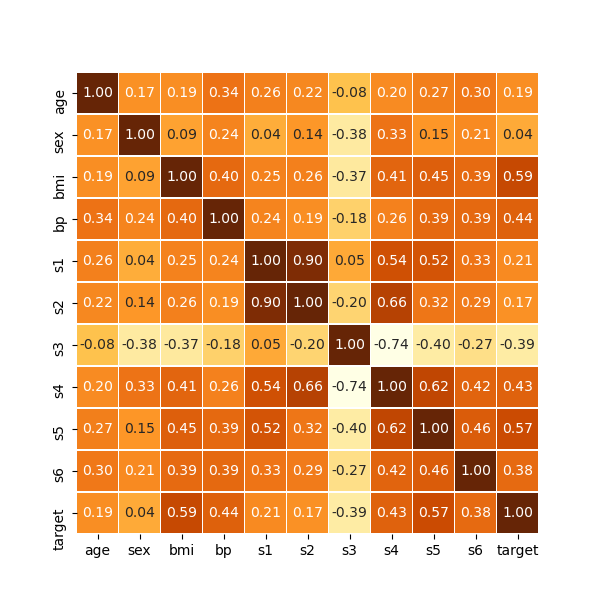

In [294]:
plt.figure(figsize=(6,6))
sns.heatmap(data.frame.corr(), annot=True, fmt='.2f', square=True, linewidth=.5, cmap="YlOrBr", cbar=False);

### Make Dummy Variabel for Catagorical Data

In [289]:
X = data.data
y = data.target

categorical_column = ['sex']
X = pd.get_dummies(X, columns=categorical_column)
X

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_-0.044641636506989,sex_0.0506801187398187
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,0,1
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,0,1
439,0.041708,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,0,1
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,1,0


### Make Model

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### List of Coefficients

In [291]:
lst = [['Intercept', round(model.intercept_, 3)]]
for label, coef in zip(X.columns, np.round(model.coef_, 3)):
    lst.append([label, coef])
pd.DataFrame(lst, columns=['Feature', 'Estimated coefficients'])

,Feature,Estimated coefficients
0,Intercept,152.438
1,age,-43.268
2,bmi,593.398
3,bp,302.898
4,s1,-560.277
5,s2,261.477
6,s3,-8.833
7,s4,135.937
8,s5,703.227
9,s6,28.348


### R Square

In [296]:
y_pred = model.predict(X_test)

print('R2 Score: {}'.format(r2_score(y_test, y_pred)))

pd.DataFrame({'True' : y_test, 
              'Prediction': np.round(y_pred, 3),
              'Error^2' : np.round(np.square(y_pred - y_test), 3)}).reset_index(drop=True)

R2 Score: 0.3594009098971561


,True,Prediction,Error^2
0,321.0,241.847,6265.150
1,215.0,250.123,1233.628
2,127.0,164.965,1441.308
3,64.0,119.116,3037.817
4,175.0,188.231,175.065
...,...,...,...
106,192.0,221.229,854.306
107,233.0,267.697,1203.887
108,68.0,115.622,2267.889
109,160.0,113.983,2117.557
